<a href="https://colab.research.google.com/github/Tannuv95/Sentimental-Analysis-of-LalSingh-chadda-movie/blob/main/Sentimental_Analysis_of_Movie_Lal_Sing_Chadda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [32]:
# Get the data
import snscrape.modules.twitter as sntwitter
import pandas as pd
query = "((LalSinghChadha OR LalSinghChadha Amir movie OR LalSinghChaddhareview) lang:en until:2022-08-18 since:2022-08-11)"
tweets = []
limit = 1000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets) == limit:
    break
  else:
    tweets.append([tweet.date, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'Tweet'])
print(df)

                         Date  \
0   2022-08-17 19:15:36+00:00   
1   2022-08-17 09:01:32+00:00   
2   2022-08-17 07:12:40+00:00   
3   2022-08-17 04:59:37+00:00   
4   2022-08-17 01:38:31+00:00   
..                        ...   
152 2022-08-11 07:40:40+00:00   
153 2022-08-11 07:37:34+00:00   
154 2022-08-11 06:43:14+00:00   
155 2022-08-11 06:10:49+00:00   
156 2022-08-11 05:42:07+00:00   

                                                 Tweet  
0    @dhruv_rathee Abbe chutiye, kitna paisa mila h...  
1    @theprayagtiwari People who are boycotting #Hr...  
2    #LalSinghChadha earned only 2 crores on Tuesda...  
3    #LalSinghChadha wow…there’s not a single perso...  
4    That luxury of watching a movie alone in the t...  
..                                                 ...  
152  You ever seen this movie which Amir play polic...  
153  Probably a big setback for Amir khan....Now al...  
154  #LalSinghChaddha  Amir khan as always has play...  
155  Amirkhan acting peaks\n✓ Ami

In [33]:
# clean text
# create function to clean text
def cleanTxt(text):
  text=re.sub('@[A-Za-z0-9]+','',text)#Removed @mentions
  text=re.sub(r'#','',text)#Removing the '#'symbol
  text=re.sub(r'RT[\s]+','',text)#Removing RT(retweets)
  text=re.sub(r'https?:\/\/\S+','',text)#Remove the hyper link

  return text
df['Tweet']=df['Tweet'].apply(cleanTxt) 
#Show cleaned tweets
df

,Date,Tweet
0,2022-08-17 19:15:36+00:00,"_rathee Abbe chutiye, kitna paisa mila hain te..."
1,2022-08-17 09:01:32+00:00,People who are boycotting HrithikRoshan movie...
2,2022-08-17 07:12:40+00:00,LalSinghChadha earned only 2 crores on Tuesday...
3,2022-08-17 04:59:37+00:00,LalSinghChadha wow…there’s not a single person...
4,2022-08-17 01:38:31+00:00,That luxury of watching a movie alone in the t...
...,...,...
152,2022-08-11 07:40:40+00:00,You ever seen this movie which Amir play polic...
153,2022-08-11 07:37:34+00:00,Probably a big setback for Amir khan....Now al...
154,2022-08-11 06:43:14+00:00,LalSinghChaddha Amir khan as always has playe...
155,2022-08-11 06:10:49+00:00,Amirkhan acting peaks\n✓ Amir Khan entry\n✓ sh...


In [34]:
df.head(10)

,Date,Tweet
0,2022-08-17 19:15:36+00:00,"_rathee Abbe chutiye, kitna paisa mila hain te..."
1,2022-08-17 09:01:32+00:00,People who are boycotting HrithikRoshan movie...
2,2022-08-17 07:12:40+00:00,LalSinghChadha earned only 2 crores on Tuesday...
3,2022-08-17 04:59:37+00:00,LalSinghChadha wow…there’s not a single person...
4,2022-08-17 01:38:31+00:00,That luxury of watching a movie alone in the t...
5,2022-08-16 23:24:05+00:00,Watched AmirKhan &amp; KareenaKapoor starrer L...
6,2022-08-16 19:34:02+00:00,People who are boycotting HrithikRoshan movie ...
7,2022-08-16 19:20:43+00:00,I was Thinking That LaalSinghChadha might be A...
8,2022-08-16 18:23:36+00:00,Watched LalSinghChadha and didn't think I'd co...
9,2022-08-16 18:07:41+00:00,People who are boycotting HrithikRoshan movie ...


In [35]:
# Create a function to get the sbjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a fuction to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df['Tweet'].apply(getPolarity)


#Show the new dataframe with new columns
df
#df.to.csv("final_tweet_data",index=False)

,Date,Tweet,Subjectivity,Polarity
0,2022-08-17 19:15:36+00:00,"_rathee Abbe chutiye, kitna paisa mila hain te...",0.444444,0.388889
1,2022-08-17 09:01:32+00:00,People who are boycotting HrithikRoshan movie...,0.400000,0.200000
2,2022-08-17 07:12:40+00:00,LalSinghChadha earned only 2 crores on Tuesday...,1.000000,0.000000
3,2022-08-17 04:59:37+00:00,LalSinghChadha wow…there’s not a single person...,0.607143,0.017857
4,2022-08-17 01:38:31+00:00,That luxury of watching a movie alone in the t...,0.715000,0.455000
...,...,...,...,...
152,2022-08-11 07:40:40+00:00,You ever seen this movie which Amir play polic...,0.000000,0.000000
153,2022-08-11 07:37:34+00:00,Probably a big setback for Amir khan....Now al...,0.150000,0.100000
154,2022-08-11 06:43:14+00:00,LalSinghChaddha Amir khan as always has playe...,1.000000,0.850000
155,2022-08-11 06:10:49+00:00,Amirkhan acting peaks\n✓ Amir Khan entry\n✓ sh...,0.000000,0.000000


In [36]:
#Create a fuction to compute the negative ,neutarl and positive analysis 
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score>0:
    return 'Positive'
  else:
    return 'Neutral'

df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the datafra
df

,Date,Tweet,Subjectivity,Polarity,Analysis
0,2022-08-17 19:15:36+00:00,"_rathee Abbe chutiye, kitna paisa mila hain te...",0.444444,0.388889,Positive
1,2022-08-17 09:01:32+00:00,People who are boycotting HrithikRoshan movie...,0.400000,0.200000,Positive
2,2022-08-17 07:12:40+00:00,LalSinghChadha earned only 2 crores on Tuesday...,1.000000,0.000000,Neutral
3,2022-08-17 04:59:37+00:00,LalSinghChadha wow…there’s not a single person...,0.607143,0.017857,Positive
4,2022-08-17 01:38:31+00:00,That luxury of watching a movie alone in the t...,0.715000,0.455000,Positive
...,...,...,...,...,...
152,2022-08-11 07:40:40+00:00,You ever seen this movie which Amir play polic...,0.000000,0.000000,Neutral
153,2022-08-11 07:37:34+00:00,Probably a big setback for Amir khan....Now al...,0.150000,0.100000,Positive
154,2022-08-11 06:43:14+00:00,LalSinghChaddha Amir khan as always has playe...,1.000000,0.850000,Positive
155,2022-08-11 06:10:49+00:00,Amirkhan acting peaks\n✓ Amir Khan entry\n✓ sh...,0.000000,0.000000,Neutral


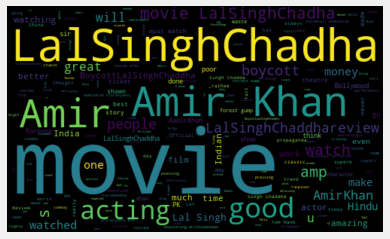

In [37]:
# Plot word cloud 
allwords=''.join([twts for twts in df['Tweet']]) 
wordCloud = WordCloud(stopwords=STOPWORDS,width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

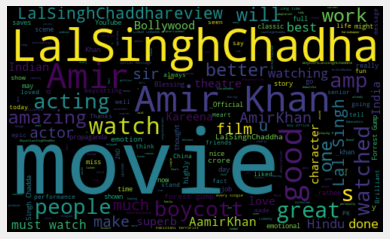

In [38]:
# Plot word cloud for positive words
allwords=''.join([twts for twts in df['Tweet'][df['Analysis']=='Positive']]) 
wordCloud = WordCloud(stopwords=STOPWORDS,width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

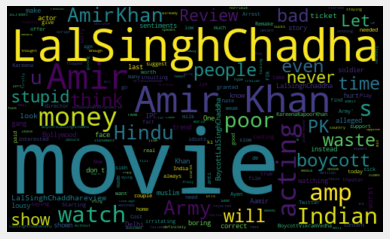

In [39]:
# Plot word cloud for positive words
allwords=''.join([twts for twts in df['Tweet'][df['Analysis']=='Negative']]) 
wordCloud = WordCloud(stopwords=STOPWORDS,width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
# Print all of the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweet'][i])
    print()
    j=j+1

1) _rathee Abbe chutiye, kitna paisa mila hain tereko to tell this Amit is better than Tom Hanks. Saale India main rehta Hain ye amir aur bolta hai. Not feeling safe. Saleko bol Syria mein jaake banaye movie. India boycotts him and will permanently 
LalSinghChadha BoycottLaalSinghChaddha

2)  People who are boycotting HrithikRoshan movie VikramVedha whole Bollywood just because he praised Amir’s movie LalSinghChadha You should boycott Tollywood Rajamouli RamCharan Chiranjeevi NTR too because they are also praising the movie.

3) LalSinghChadha wow…there’s not a single person in the theater (it’s only a 6th day &amp; discounttuesday)😱 Never ever thought it will happen for Amir’s movie 

4) That luxury of watching a movie alone in the theatre ! LalSinghChadha an emotional roller coaster ! A very Good one Amir khan 

5) Watched AmirKhan &amp; KareenaKapoor starrer LalSinghChadha . 
One of the best movie of these actors. Movie full of emotions and some real good performances. A must watch.

In [41]:
# Print all of the Negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending =False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweet'][i])
    print()
    j=j+1

1) LalSinghChadha failed because of poor content from a powerhouse like Amir. Trailer itself was not good, so many of us avoided the movie. There's no other reason. Poor content means we are staying away. Have paid enough to OTTs already.

2) As always Amir Khan came as the stupid I ever know..saying that his wife is scared of India well then leave this country..and don’t expect the indians to see your movie as you take them for granted so they will take your movie as for granted AmirKhan boycott LalSinghChadha

3)  Its true so much irritating face made by amir. I had just watch till 45-50 min and then left the  theater. Now I had no courage to watch rest of movie again 😑 LalSinghChadha

4) Funny thing is that both AmirKhan and 
boycott gang thinks that LalSinghChadha flopped because of BoycottLalSinghChadha trend.
Both sides don't want to admit that it's rejected because it is a movie with weak script and horrible acting by Amir and not worth watching.

5) LalSinghChadha is not even w

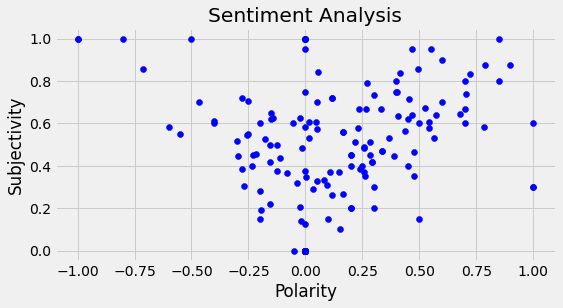

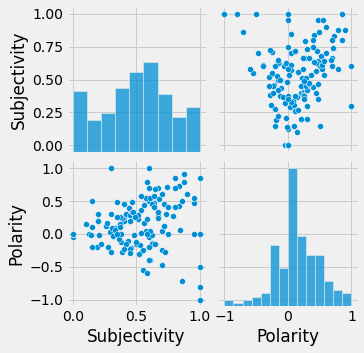

In [42]:
# Plot subjectivity and polarity
#Subjectivity quantifies the amount of personal opinion and factual information contained in the text
plt.figure(figsize=(8,4))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
sns.pairplot(df[['Subjectivity','Polarity']])

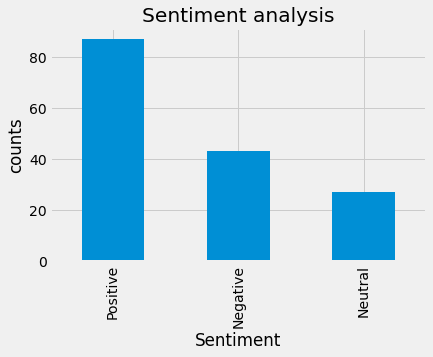

In [43]:
# Show the Value counts
df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [44]:
fig = px.pie(df, names='Analysis', title ='Pie chart of different sentiments of tweets')
fig.show()